# Neil Shah DATA 621: Blog 5
# Random Forest/Model Selection

In my last [blog post](https://github.com/shahneilp/DATA621-Blogs/blob/master/Blog4--GLM%20Regression.ipynb) I used a Generalized Linear Model (Huber Regression) to deal with lack of normality in my residuals between the Ethanol and Gasoline correlation.

In this final blog post we are going to put everything together, try out another Regression model (Random Forest) and then select a model via a metric.

Let's go!

In [1]:
#import our friends and data set
import statsmodels.api as sm
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline
#Loading data set
ethanol=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/sampledata.csv',header=0,index_col=0,parse_dates=True)
gasoline=pd.read_csv('https://raw.githubusercontent.com/shahneilp/DATA621-Blogs/master/blog2sample.csv',header=0,index_col=0,parse_dates=True)
#combining them
df=pd.DataFrame(data=ethanol.copy())
df['Gasoline']=gasoline
df.columns=['Ethanol','Gasoline']
#Make a clean copy of the data
data=df.loc['02-2020':].copy()
X=data['Gasoline'].values
y=data['Ethanol'].values

Text(0.5, 1.0, 'Gasoline vs Ethanol')

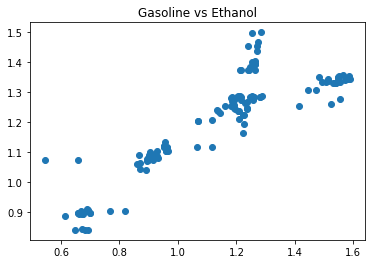

In [2]:
#Plotting Data
plt.scatter(X,y)
plt.title('Gasoline vs Ethanol')

The previous two blogs used a Linear Regression but after reading this post [Random Forest vs Linear](https://www.quora.com/When-are-random-forests-RFs-better-than-linear-regression-models-Do-RFs-fit-nonlinear-data-better-from-the-get-go-without-a-plotting-transform-dance-Are-there-other-cases-where-I-should-use-RF-instead-of-trusty-old-linear-models) it got me thinking that maybe a Random Forest Regression model will help!

Random forest is an ensemble method and can actually provide better performance since it can capture some nuances of non-linearity--if you recall from our plot above--there are some outliers and the data isn't exactly linear.

Let's try the Random Forest--which is deployed very similar to the others in scikit!

In [5]:
#Lets import Linear and Huber from last time
from sklearn.linear_model import LinearRegression, HuberRegressor
#And now import Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

First let's do our usual test/train split and get our R^2

In [7]:
rf=RandomForestRegressor()
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test).reshape(-1,1)
rf.score(y_pred,y_test)

<ipython-input-7-590ac60393ea>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.4474758438440295

Well that wasn't the R^2 we were looking for--recall that the Huber/OLS had one of .60? Well Random Forest actually takes an input as number of trees (or nodes) to help it's decision process--let's try setting it n to 10 and see what happens

In [8]:
rf=RandomForestRegressor(n_estimators=10)
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test).reshape(-1,1)
rf.score(y_pred,y_test)

<ipython-input-8-9c9646d1a106>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5536495978802696

That helped! Let's try it again! N=20

In [10]:
rf=RandomForestRegressor(n_estimators=20)
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test).reshape(-1,1)
rf.score(y_pred,y_test)

<ipython-input-10-2eb535a53c9c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.5375967522974503

Seems increasing trees doesn't automatically mean better performance--let's try looping through a few values to see waht happens.

In [12]:
trees=range(10,60,10)
score=[]
for n in trees:
    rf=RandomForestRegressor(n_estimators=n)
    X=X.reshape(-1,1)
    y=y.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test).reshape(-1,1)
    score.append(rf.score(y_pred,y_test))
print(dict(zip(trees,score)))

<ipython-input-12-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-12-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-12-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-12-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-12-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{10: 0.5876280947633221, 20: 0.6192696264477805, 30: 0.6267531453978322, 40: 0.31355831303561577, 50: 0.6833787559933299}


Let's run it one more time to get consistency

In [13]:
trees=range(10,60,10)
score=[]
for n in trees:
    rf=RandomForestRegressor(n_estimators=n)
    X=X.reshape(-1,1)
    y=y.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test).reshape(-1,1)
    score.append(rf.score(y_pred,y_test))
print(dict(zip(trees,score)))

<ipython-input-13-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-13-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-13-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-13-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
<ipython-input-13-dae29e0da934>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{10: 0.4963638957704988, 20: 0.5190646173912428, 30: 0.4682229993084722, 40: 0.4932109725850028, 50: 0.5182208861301763}


So it seems 20 and 50 give the best results--let's just go with 50 more nodes!

So now that we have three models--OLS, Huber and Random Forest how do we choose one? Well we could go with R^2 but that tends to be just the correlation, it doesn't tell us how well our data does predictively.

I read about using the [RMSE](https://www.vernier.com/til/1014) or Root Mean Squared Error which is an error metric in units of our Y (or ethanol price) and how far it deviates. Since our goal is to predict ethanol pricess based on gasoline, this makes sense.

I will now re-test ALL of our models (OLD, Huber and Random Forest with n=50) and use the metric RMSE to determine the best model!

In [14]:
#First let's import RMSE
from sklearn.metrics import mean_squared_error

In [17]:
#Set up our test train splits 
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Set up model dictionary
#define models
rf=RandomForestRegressor(n_estimators=50)
lm=LinearRegression()
hm=HuberRegressor()
modelnames=['OLS','Huber','Random Forest']
models=[lm,hm,rf]
rmse=[]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
print(dict(zip(modelnames,rmse)))

c:\users\neil\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-17-f5c4332688af>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


{'OLS': 0.07463238163198939, 'Huber': 0.07636211908630099, 'Random Forest': 0.04957398132258887}


Here are the results--so using our OLS our predictions will be off around .075 cents, Huber 0.076 cents and for Random Forest--only .049 cents--meaning Random Forest is the winner!

Let's just do a quick gut check on whether that error is acceptable by comparing the standard deviation of differences

In [24]:
np.std(np.diff(y,axis=0))

0.03682508463386553

So the average difference in our ethano prices is .036 cents, and our error in our model is around .049 cents...

Oh no--while our model gives us a better estimate, it's still more than our standard deviation in changes in ethanol prices.

While this means maybe we need to refine it before we trade--this blog showed how to test a model in real world!

Hope you enjoyed!